In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
change_axis = np.array([
    [-1,0,0,0],
    [0,0,1,0],
    [0,1,0,0],
    [0,0,0,1]
])

In [6]:
def translate(r):
    return np.array([
        [1,0,0,0],
        [0,1,0,r],
        [0,0,1,0],
        [0,0,0,1]
    ])

In [7]:
def rotate_phi(phi):
    angle = (phi-90)/180.*np.pi
    c, s = np.cos(angle), np.sin(angle)
    return np.array([
        [1,0,0,0],
        [0, c,-s, 0],
        [0,s,c,0],
        [0,0,0,1]
    ])


In [8]:
def rotate_theta(theta):
    angle = (90-theta)/180.*np.pi
    c, s = np.cos(angle), np.sin(angle)
    return np.array([
        [c,-s,0,0],
        [s,c,0,0],
        [0,0,1,0],
        [0,0,0,1]
    ])

In [10]:
def w2c(r,theta, phi):
    return change_axis @ translate(-r) @ rotate_phi(phi) @ rotate_theta(theta)
def c2w(r,theta,phi):
    return rotate_theta(theta).T @ rotate_phi(phi).T @ translate(r) @ change_axis

In [27]:
origin = np.array([0,0,0,1])
view_dir = np.array([0,0,-1,1])
origin, view_dir = origin[...,None], view_dir[..., None]

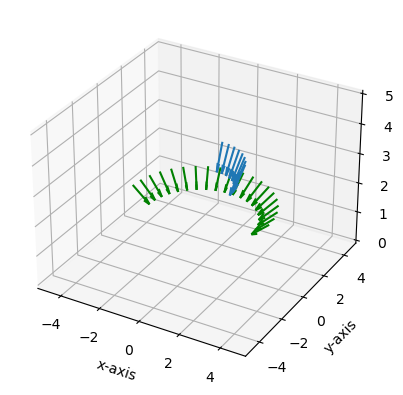

In [48]:
r = 4
phi = 30
thetas = np.linspace(0, 90, 10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for theta in thetas:
    start = c2w(r,theta, phi) @ origin
    dest = c2w(r,theta, phi) @ view_dir
    delta = dest - start
    ax.quiver(start[0], start[1], start[2], delta[0], delta[1], delta[2])

phi = 60
thetas = np.linspace(0, 180, 20)
for theta in thetas:
    start = c2w(r,theta, phi) @ origin
    dest = c2w(r,theta, phi) @ view_dir
    delta = dest - start
    ax.quiver(start[0], start[1], start[2], delta[0], delta[1], delta[2], color='g')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 5])
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.show()

In [17]:
origi

array([[-6.7609589 ],
       [14.62844404],
       [62.63018611],
       [ 1.        ]])

In [18]:
dest

array([[-4.50000000e+00],
       [ 2.75545530e-16],
       [ 7.79422863e+00],
       [ 1.00000000e+00]])